In [1]:
import sys
sys.path.insert(0, '../src')


In [2]:
from megs.model.mPCA import mPCA
from megs.data import image, DataLoader

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_context("paper")
#Load Data
data = DataLoader("/export/home/ucakir/MEGS/MEGS/src/megs/data/galaxy_data.hdf5")

File: /export/home/ucakir/MEGS/MEGS/src/megs/data/galaxy_data.hdf5
Group: Galaxies
    Group: Attributes
        Dataset: halo_id (float32) ((12484,))
        Dataset: mass (float32) ((12484,))
    Group: Particles
        Group: stars
            Group: Images
                Group: dim2
                    Dataset: GFM_Metallicity (float32) ((12484, 64, 64))
                    Dataset: GFM_StellarFormationTime (float32) ((12484, 64, 64))
                    Dataset: Masses (float32) ((12484, 64, 64))
                Group: dim3
                    Dataset: GFM_Metallicity (float32) ((12484, 64, 64, 64))
                    Dataset: GFM_StellarFormationTime (float32) ((12484, 64, 64, 64))
                    Dataset: Masses (float32) ((12484, 64, 64, 64))


In [3]:
norm = image.norm
lower = 0.25
upper = 1.0
norm_function_args = {"Masses": {"takelog": True, "plusone": True,"lower": lower, "upper": upper},
                     "GFM_Metallicity": {"takelog": True, "plusone": True, "lower": 0.1, "upper": upper},
                     "GFM_StellarFormationTime": {"takelog": True, "plusone": True, "lower": 0.1, "upper": upper},
                    
}

# Define Model
mm = mPCA(data, norm_function = norm, norm_function_kwargs=norm_function_args, dim = 2)

# Train Model
mm.fit(n_components=60, show_results = False)

Creating datamatrix with the following fields:
Particle type:  stars
Fields:  ['GFM_Metallicity', 'GFM_StellarFormationTime', 'Masses']
Dimension:  dim2
Default arguments are used for the fields that are not specified in the norm_function_kwargs
Created datamatrix with shape:  (12484, 12288)


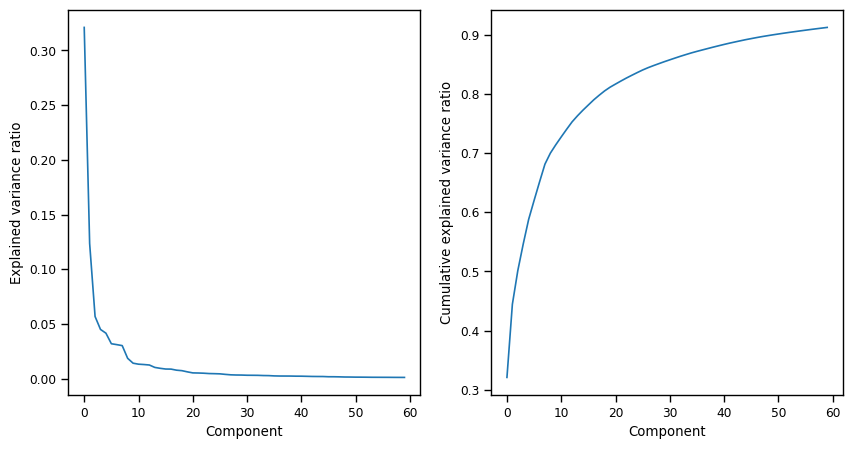

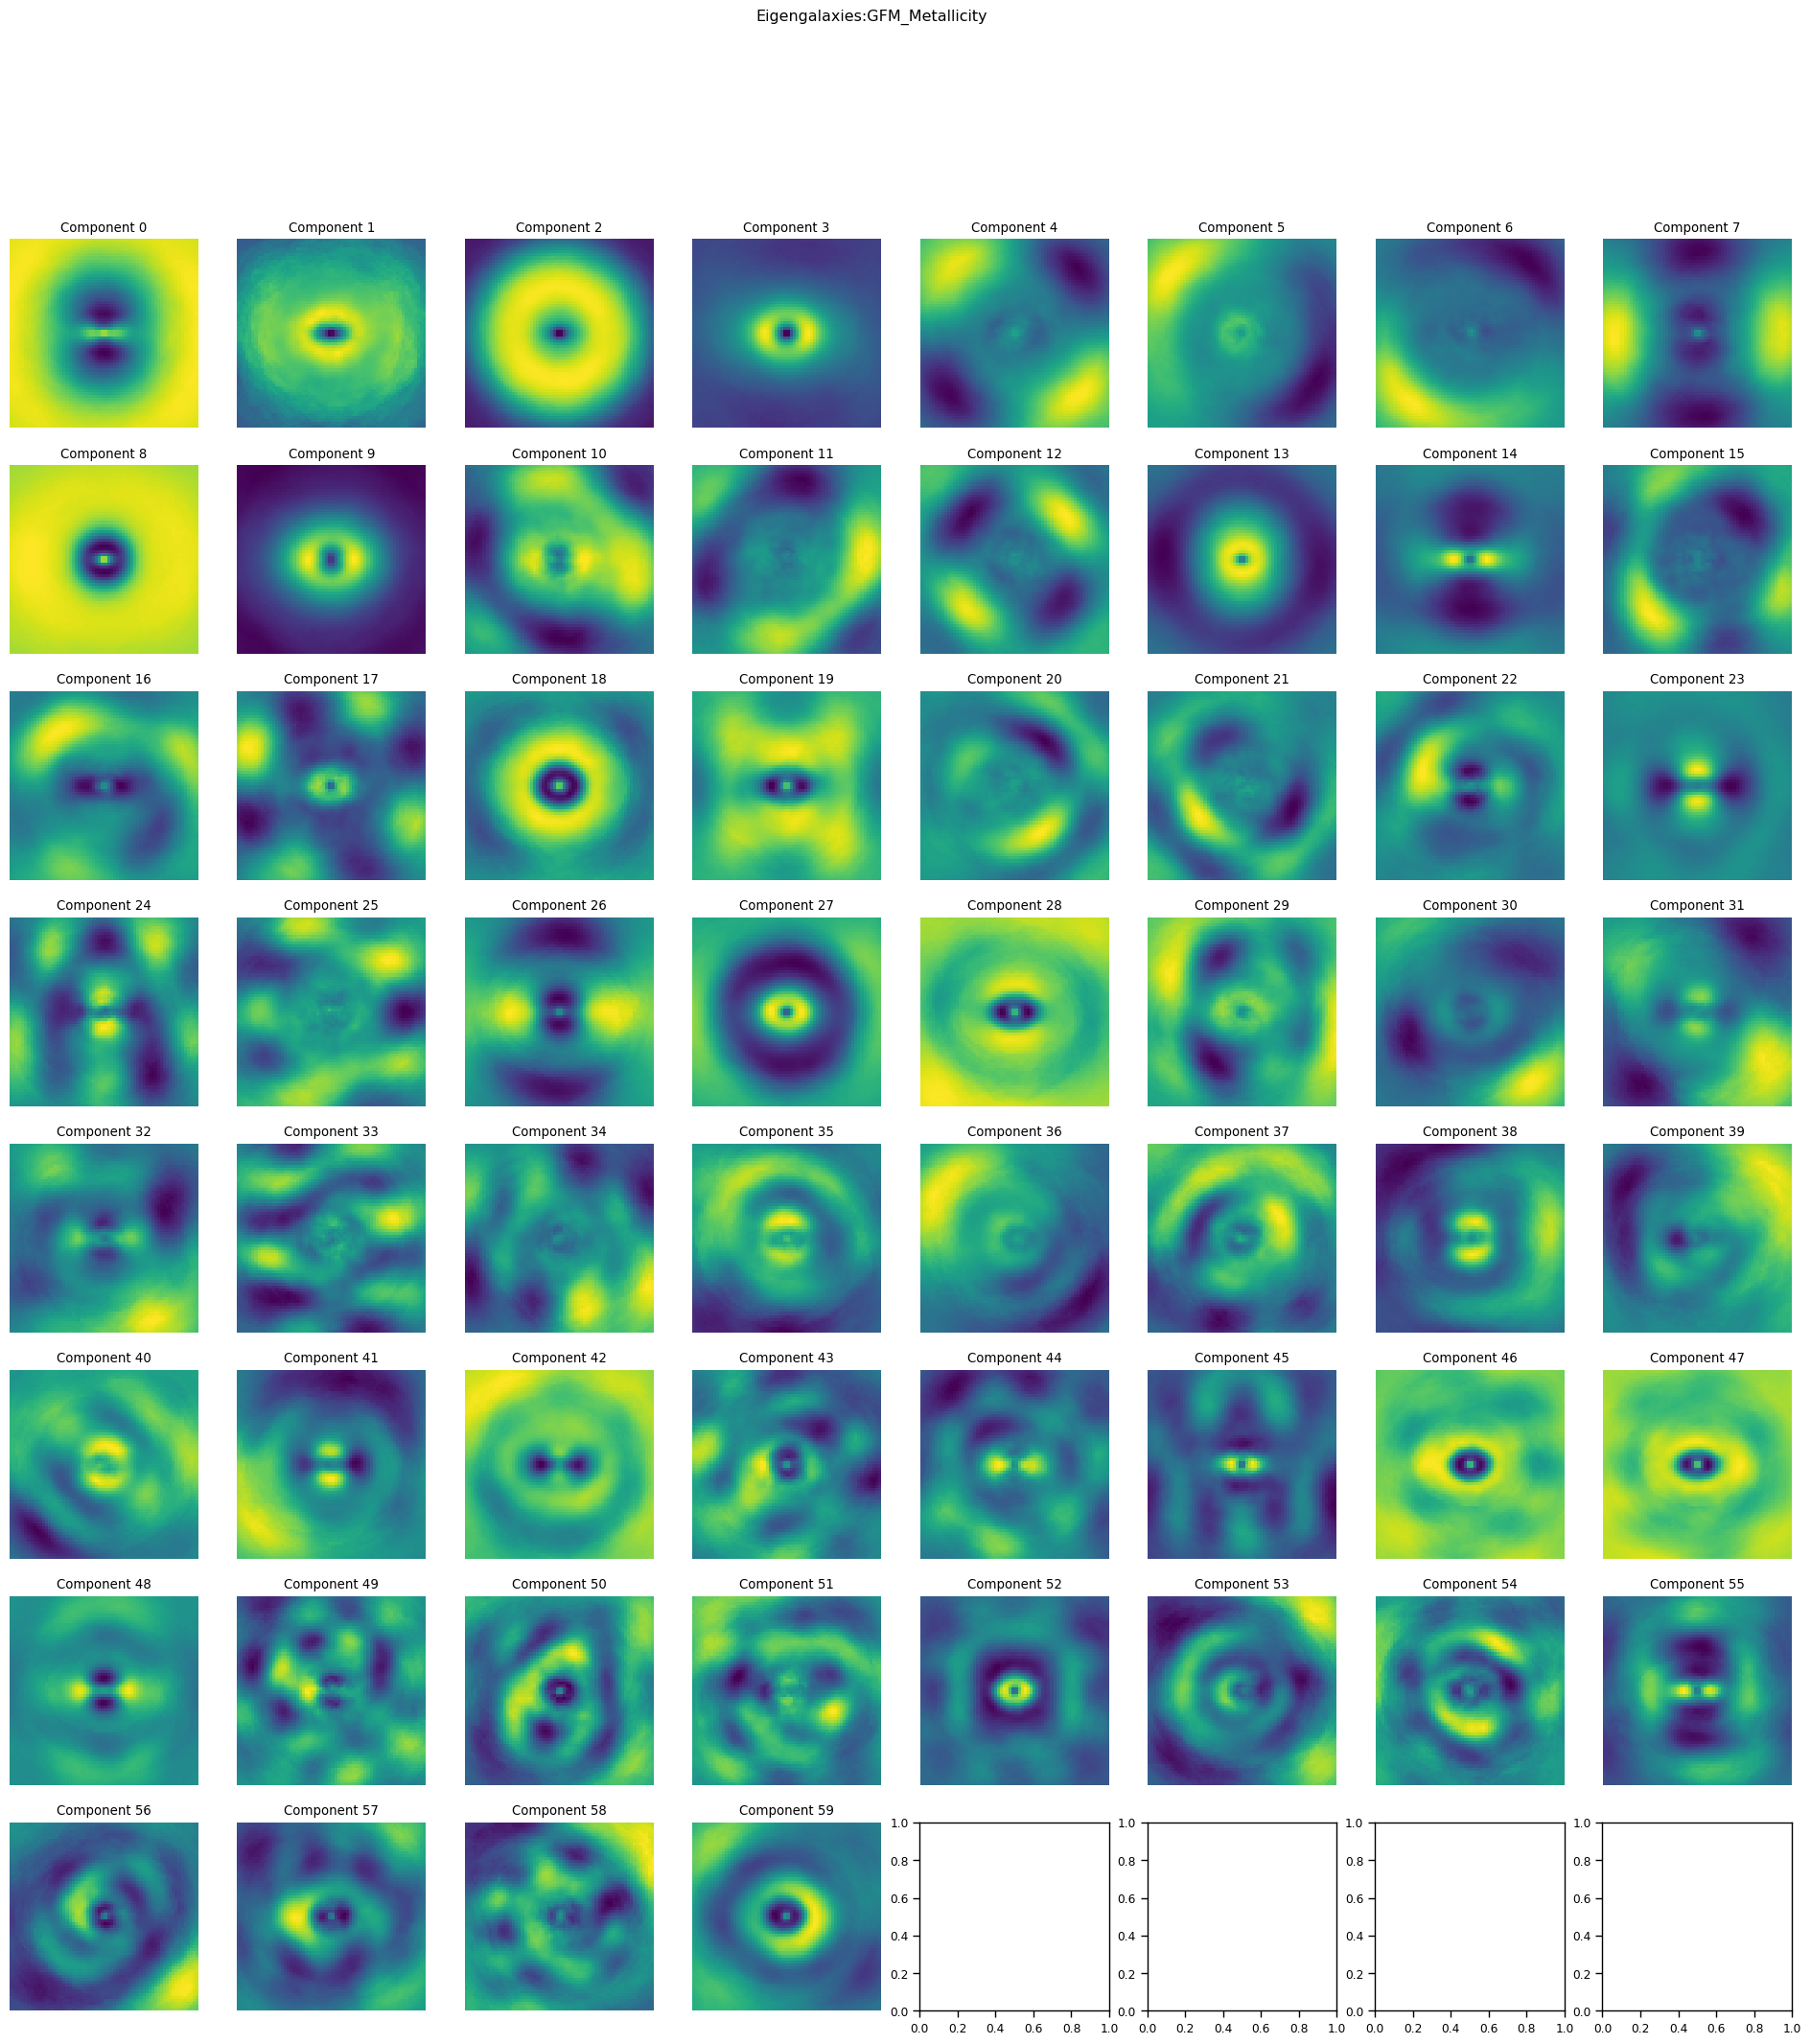

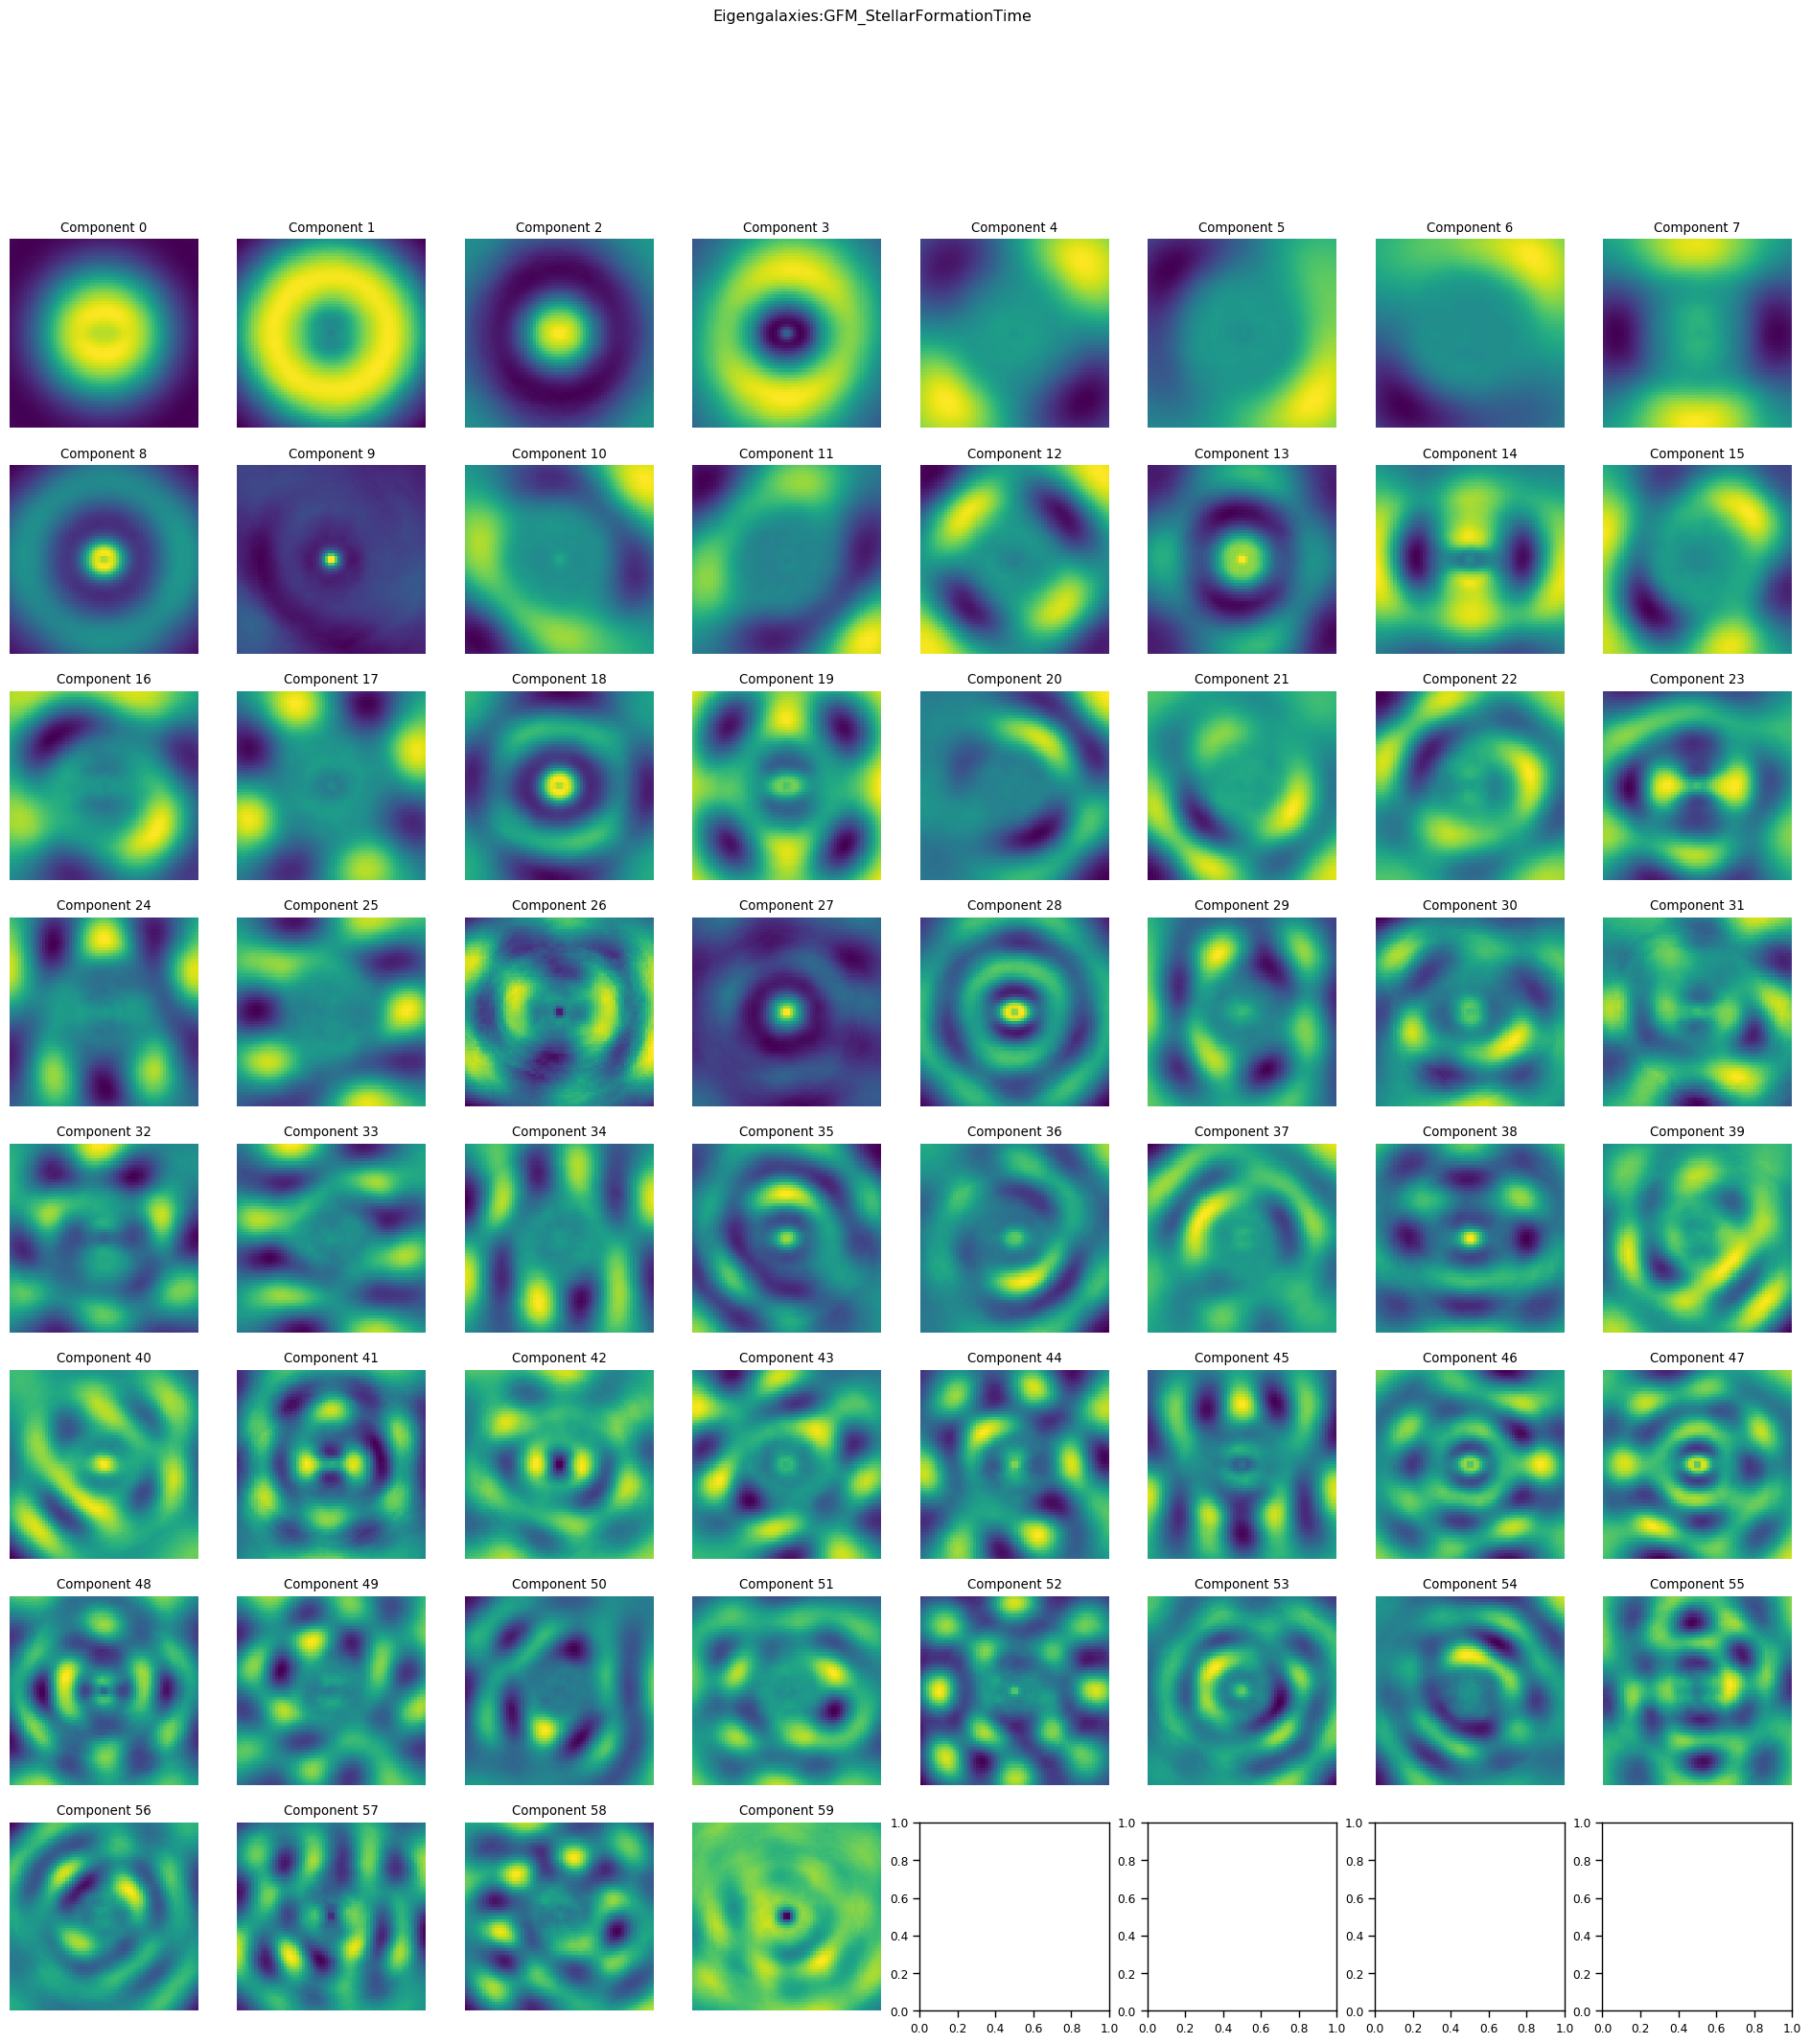

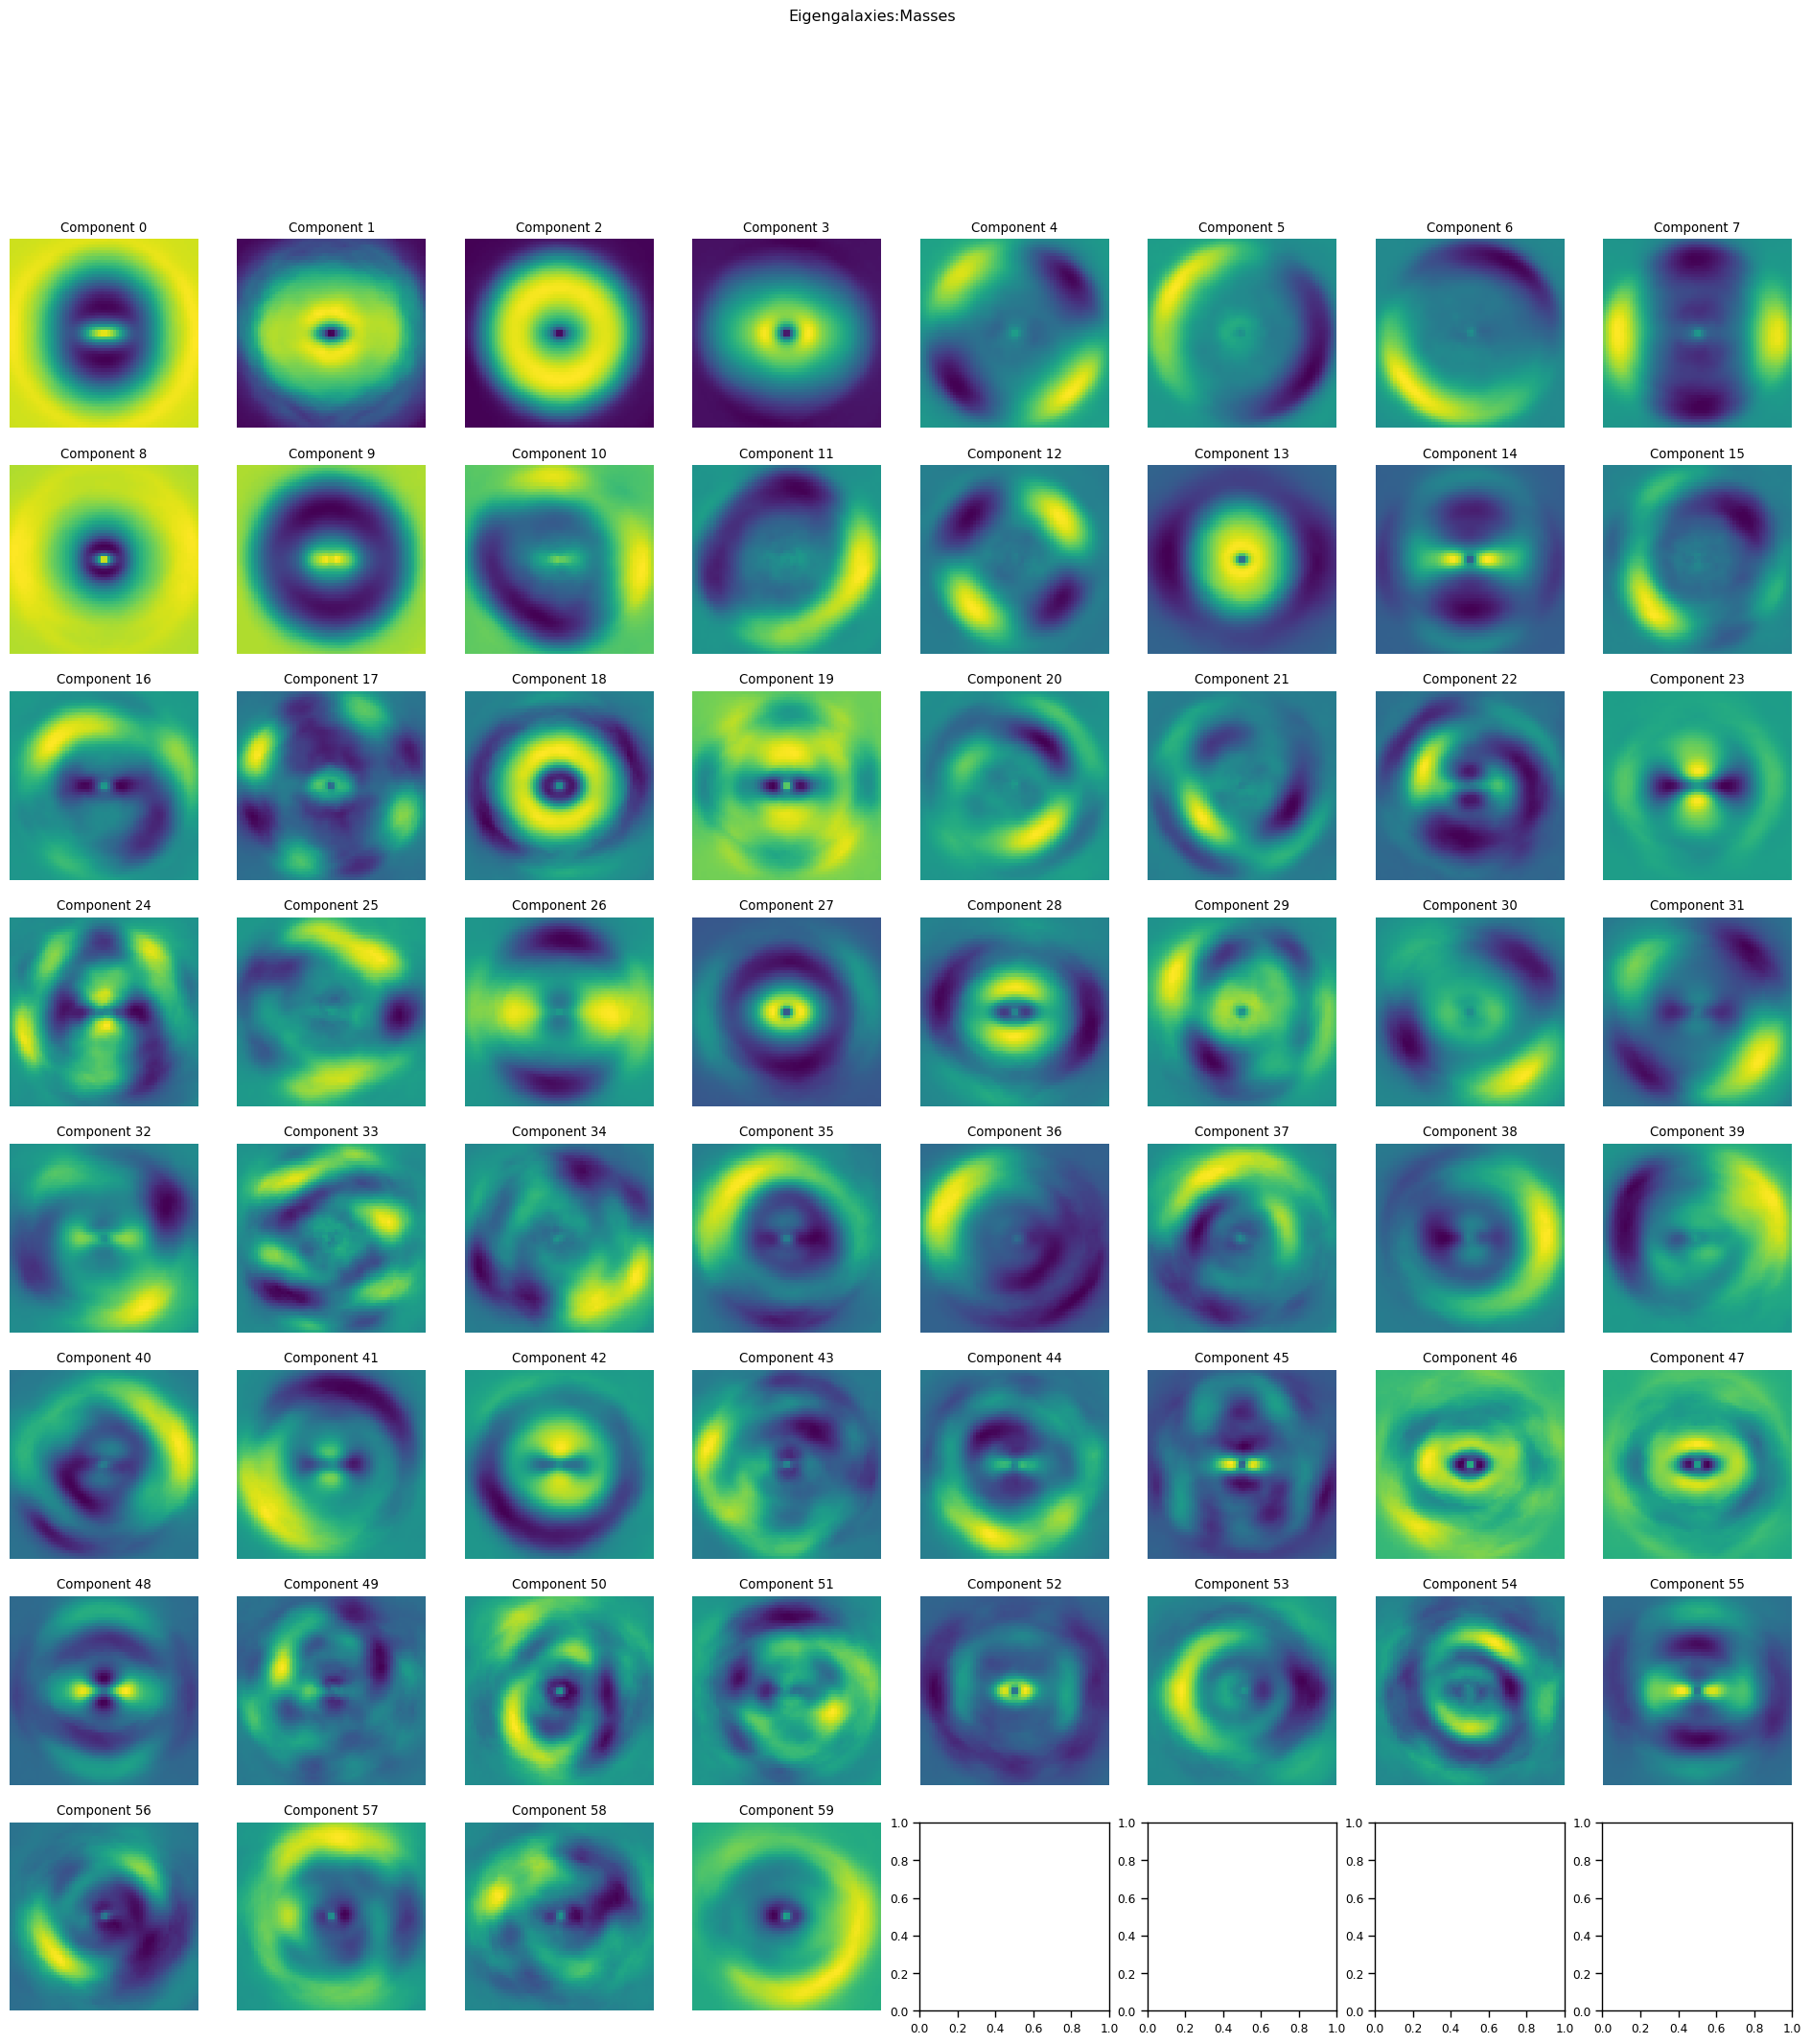

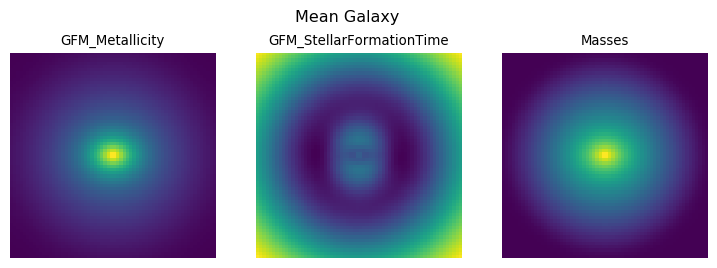

1418.0969825126895 2.1176722665668113e-05


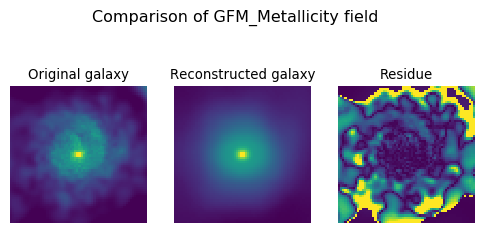

5676.391475289345 1.736529805059633e-05


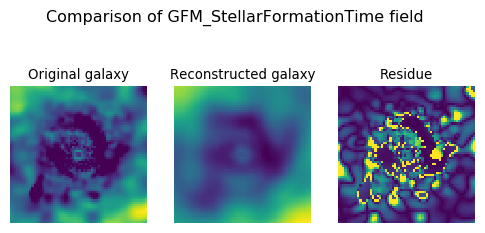

288.2538882240079 1.0617440931622686e-05


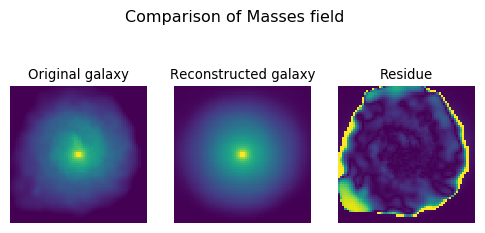

In [4]:
mm.show_results()

In [5]:
def show_maps(data,index, dim = 2, particle_type = "stars"):
    dimension = f"dim{dim}"
    plt.figure(figsize=(15, 5))
    maps = []
    for i, field in enumerate(data._image_fields[particle_type][dimension]):
        plt.subplot(1, 3, i+1)
        img = data.get_image(particle_type=particle_type, field=field, index=index, dim=dim)
        normed = image.norm(img, **norm_function_args[field])   
        plt.imshow(normed, cmap="viridis")
        plt.title(field)
        plt.colorbar()
        maps.append(normed)
    plt.show()
    return(np.array(maps))

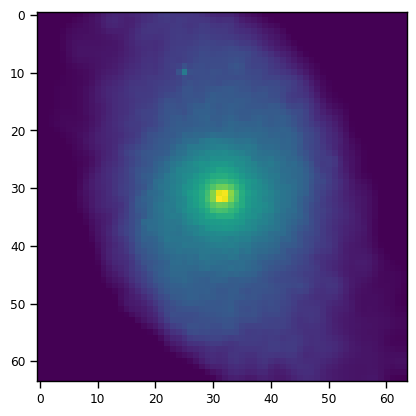

In [6]:
# Get example galaxy
gal = data.get_image("stars", "Masses", 10)
normed_gal = image.norm(gal, **norm_function_args["Masses"])
plt.imshow(normed_gal)


In [7]:
def get_means(self):
        '''Return the mean galaxy'''
        return self.pca.mean_.reshape(len(self.data._image_fields[self.particle_type][self._dim]), *self._IMG_SHAPE)

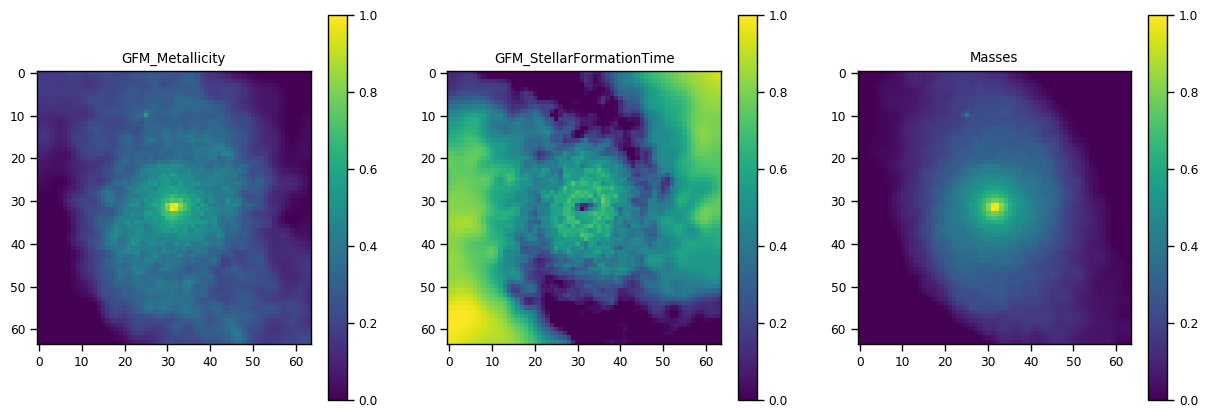

In [8]:
# Fit one galaxy
maps = show_maps(data, 10, dim = 2, particle_type = "stars")

eigengalaxies = mm.get_eigengalaxies()
means = get_means(mm)

# Project galaxy to eigenspace



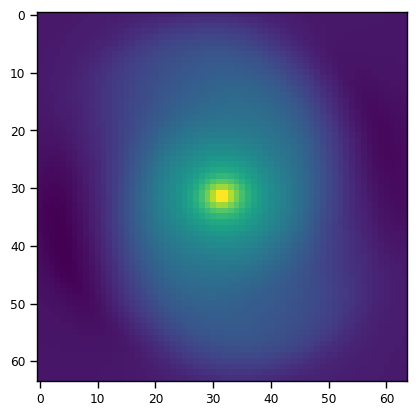

In [9]:
scores = mm.pca.transform(maps.reshape(1, -1))

reconstructed = mm.pca.inverse_transform(scores).reshape(len(mm.data._image_fields[mm.particle_type][mm._dim]), *mm._IMG_SHAPE)

plt.imshow(reconstructed[2], cmap="viridis")


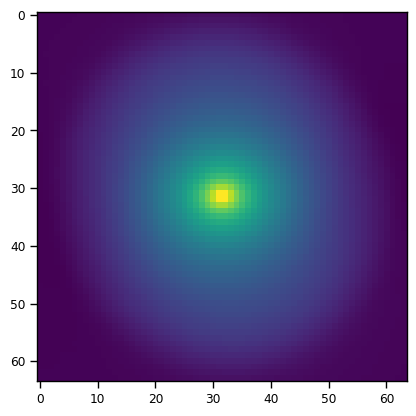

In [14]:
massimg = maps[2]

masseigen = eigengalaxies[:,2]
masseigen.shape

# Project mass galaxy image to eigenspace of mass eigengalaxies
massimg = maps[2].flatten()-means[2].flatten()
masseigen = eigengalaxies[:,2].reshape(60,-1)
projection = np.dot(massimg, masseigen.T)

mass_rec = np.dot(projection, masseigen) + means[2].flatten()
plt.imshow(mass_rec.reshape(64,64))


In [23]:
mm._IMG_ORDER

['GFM_Metallicity', 'GFM_StellarFormationTime', 'Masses']

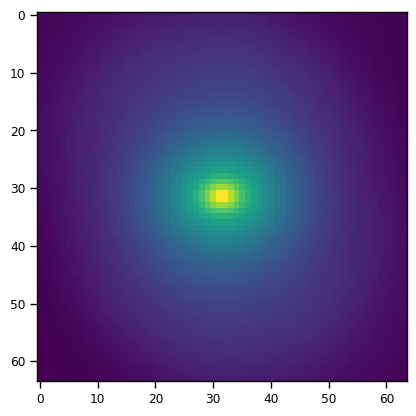

In [25]:
metall_rec = np.dot(projection, eigengalaxies[:,0].reshape(60,-1)) + means[0].flatten()
plt.imshow(metall_rec.reshape(64,64))

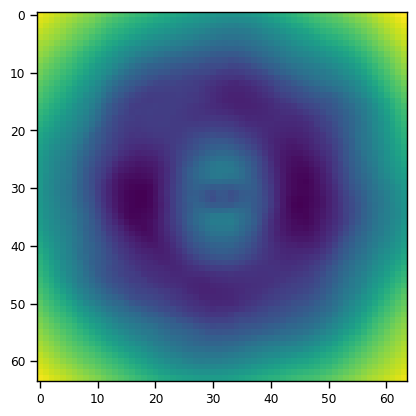

In [26]:
age_rec = np.dot(projection, eigengalaxies[:,1].reshape(60,-1)) + means[1].flatten()
plt.imshow(age_rec.reshape(64,64))


In [15]:
projection

array([ 3.96426082e-01, -4.33492204e-01, -1.92730998e+00, -1.47454623e+00,
        2.47226920e-01,  4.19054757e-02,  4.87701093e-03, -1.67653759e-02,
        9.73993670e-01,  1.96632124e+00,  4.28480690e-01,  9.39885317e-02,
       -8.69109123e-02, -7.65133606e-01, -2.68700730e-01,  4.60814547e-02,
        1.31087334e-01, -8.62451696e-04, -2.01831098e-01,  1.75759178e-01,
       -7.05131116e-02,  4.41119289e-02, -1.10217390e-01, -1.48108326e-02,
       -6.14100935e-02,  1.95948184e-01, -1.72160420e+00, -8.62526962e-01,
       -1.73974236e-01, -2.90672294e-01,  4.18362335e-01,  5.90907820e-01,
        4.90831598e-01,  2.57149781e-02,  1.05810880e-01,  1.00450134e-01,
       -5.81244532e-02,  1.97040159e-01,  1.11006541e-01,  2.08420299e-02,
       -9.84152165e-02, -3.85002762e-01,  1.08527628e-02, -7.35971074e-02,
        5.89480454e-02, -6.93286134e-02, -4.43356087e-02, -6.00805039e-02,
       -1.03299224e-02, -7.44751744e-02,  1.70514691e-01, -6.27557930e-02,
       -1.79590009e-01,  

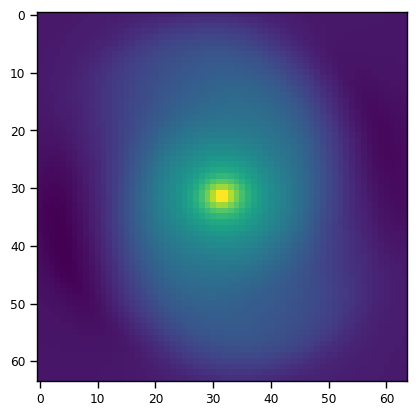

In [20]:
scroes = mm.project(maps)
reconstructed = mm.reconstruct(scores)
plt.imshow(reconstructed[2], cmap="viridis")

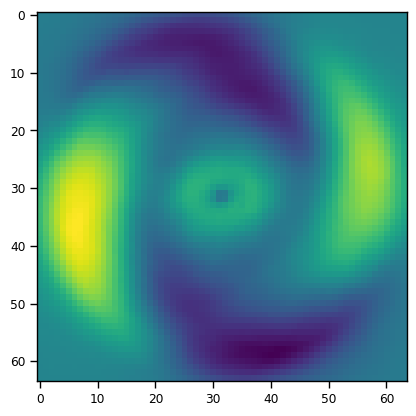

In [21]:
plt.imshow(mass_rec.reshape(64,64)-reconstructed[2], cmap="viridis")

235.62395503775676 1.4255362834913686e-05


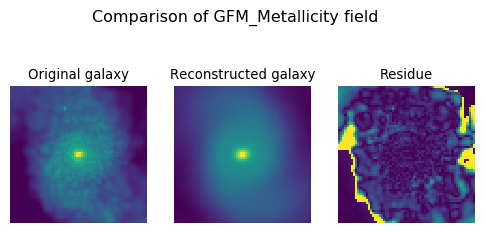

134.1622876292306 3.376960092893745e-05


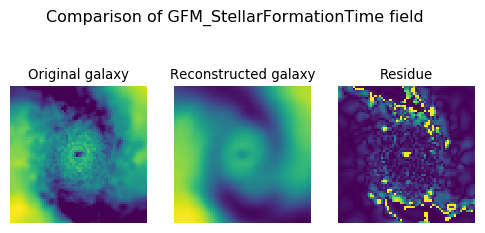

3188.8569930585045 4.267092629349576e-06


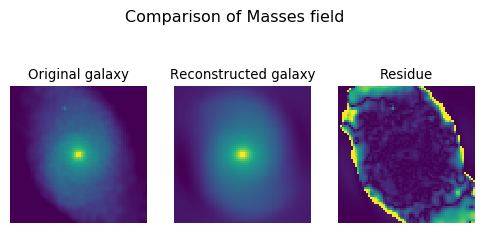

In [ ]:
mm.compare(10)

In [29]:
import torch
import torch.nn as nn

class recNet(nn.Module):
    def __init__(self, input_size, n_components):
        super(recNet, self).__init__()
        self.input_size = input_size
        self.n_components = n_components
        
        # Define the layers of the neural network
        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, n_components)
        
    def forward(self, x):
        # Flatten the input image
        x = x.view(-1, self.input_size)
        
        # Pass through the neural network layers
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        
        return x


In [30]:
input_size = 64 * 64  # Example input size for a 64x64 mass image
n_components = 60  # Example number of PCA components
network = recNet(input_size, n_components)


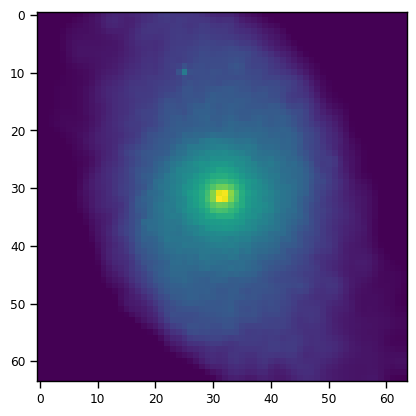

In [32]:
massimg = data.get_image("stars", "Masses", 10)
massimg = image.norm(massimg, **norm_function_args["Masses"])
plt.imshow(massimg)

In [33]:
mass_image = torch.Tensor(massimg)  # Convert your mass image to a PyTorch tensor
pca_score = network(mass_image)

In [37]:
pca_score

tensor([[ 0.0803,  0.0494,  0.0246,  0.0163,  0.0505, -0.0280, -0.0428,  0.0075,
          0.1360, -0.0220,  0.1318,  0.0266, -0.0934, -0.0046,  0.0850,  0.1177,
          0.0330,  0.1579,  0.1352, -0.0788,  0.0598,  0.0514,  0.0470,  0.0720,
         -0.1137,  0.0790, -0.0325,  0.0008,  0.0409,  0.0893, -0.0393,  0.0889,
          0.0232,  0.0315,  0.1139,  0.0385,  0.0952, -0.1246,  0.1251, -0.0620,
         -0.0288, -0.0370,  0.0316,  0.0674, -0.0011, -0.0150, -0.0007,  0.0511,
          0.0230, -0.0721,  0.0549, -0.0178,  0.0188, -0.0486, -0.0092,  0.0122,
          0.0992, -0.0390, -0.0568, -0.0959]], grad_fn=<AddmmBackward0>)

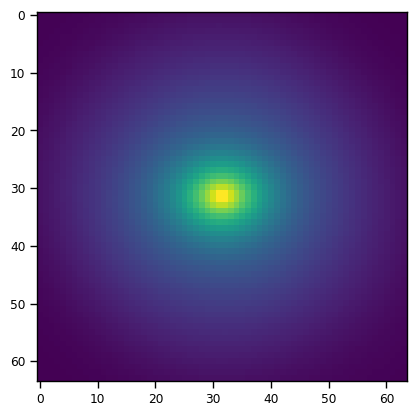

In [44]:
img = mm.reconstruct(pca_score.detach().numpy())

plt.imshow(img[0])

In [76]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the PCA model
class PCAModel(nn.Module):
    def __init__(self, eigengalaxies, pca_mean, scores=None):
        super(PCAModel, self).__init__()
        self.eigengalaxies = eigengalaxies #Shape: (num_eigengalaxies, 64*64)
        self.pca_mean = pca_mean #Shape: (64*64)
        self.num_eigenvectors = self.eigengalaxies.shape[1] #Number of eigenvectors
        if scores is None:
            # Initialize the scores randomly
            std = np.sqrt(2. / self.num_eigenvectors)
            scores = torch.randn(self.num_eigenvectors) * std
            scores.requires_grad = True
            self.scores = nn.Parameter(scores)
        else:
            self.scores = nn.Parameter(scores)
        
    def forward(self, input_image):
        # Flatten the input image
        input_image = input_image.reshape(-1, 64*64) # Shape
        
        # Subtract the mean
        input_image -= self.pca_mean.reshape(1, -1)
        
        # Project onto eigengalaxies
        pca_scores = torch.matmul(input_image, self.eigengalaxies.reshape(self.num_eigenvectors, -1).t())
        
        return pca_scores
    
    def reconstruct_image(self, pca_scores):
        # Reconstruct the image from PCA scores
        reconstructed_image = torch.matmul(pca_scores, self.eigengalaxies.reshape(self.num_eigenvectors, -1))
        
        # Add the mean
        reconstructed_image += self.pca_mean.reshape(1, -1)
        
        # Reshape the image
        reconstructed_image = reconstructed_image.reshape(-1, 64, 64)
        
        return reconstructed_image


# Define the PCA loss function
class PCALoss(nn.Module):
    def __init__(self):
        super(PCALoss, self).__init__()

    def forward(self, input_image, pca_scores, model):
        reconstructed_image = model.reconstruct_image(pca_scores)
        loss = torch.mean(torch.square(input_image - reconstructed_image))
        return loss

# Instantiate the PCA model
eigengalaxies = mm.get_eigengalaxies()
means = mm.get_means()
masseigen = eigengalaxies[:,2]
meanseigen = means[2]
# Set tensor to be of shape (1,64,64)
masseigen = masseigen.reshape(masseigen.shape[0],64,64)

eigen = torch.Tensor(masseigen)
means = torch.Tensor(meanseigen)
model = PCAModel(eigengalaxies=eigen, pca_mean=means)

# Instantiate the PCA loss function
loss_function = PCALoss()

# Generate a random mass image for training and testing

unknown = torch.randn(3,64, 64)  # Generate a random mass image

# Set the known mass image
massimg = data.get_image("stars", "Masses", 10)
massimg = image.norm(massimg, **norm_function_args["Masses"])
massimg = torch.Tensor(massimg)

# Concatenate the known and unknown mass images

unknown[2] = massimg

input_image = massimg



# Set up the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop

num_epochs = 1000
for epoch in range(num_epochs):
    # Zero the gradients
    optimizer.zero_grad()

    # Forward pass
    pca_scores = model(input_image)
    loss = loss_function(input_image, pca_scores, model)

    # Backward pass
    loss.backward(retain_graph=True)  # Retain the computation graph

    # Update the parameters
    optimizer.step()

    # Print the loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print("Epoch [{}/{}], Loss: {:.4f}".format(epoch + 1, num_epochs, loss.item()))

# Test the trained model
pca_scores = model(input_image)
reconstructed_image = model.reconstruct_image(pca_scores)

# Print the loss and the reconstructed image
print("Reconstruction Loss:", loss.item())
print("Reconstructed Image:", reconstructed_image)



RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x4096 and 3840x64)

Epoch [500/100000], Loss: 1102980.2500
Epoch [1000/100000], Loss: 4418692.5000
Epoch [1500/100000], Loss: 9947143.0000
Epoch [2000/100000], Loss: 17688330.0000
Epoch [2500/100000], Loss: 27642254.0000
Epoch [3000/100000], Loss: 39808880.0000
Epoch [3500/100000], Loss: 54188264.0000
Epoch [4000/100000], Loss: 70780352.0000
Epoch [4500/100000], Loss: 89585168.0000
Epoch [5000/100000], Loss: 110602648.0000
Epoch [5500/100000], Loss: 133832880.0000
Epoch [6000/100000], Loss: 159275808.0000
Epoch [6500/100000], Loss: 186931568.0000
Epoch [7000/100000], Loss: 216800000.0000
Epoch [7500/100000], Loss: 248881232.0000
Epoch [8000/100000], Loss: 283175328.0000
Epoch [8500/100000], Loss: 319681984.0000
Epoch [9000/100000], Loss: 358401632.0000
Epoch [9500/100000], Loss: 399334048.0000
Epoch [10000/100000], Loss: 442479232.0000
Epoch [10500/100000], Loss: 487837216.0000
Epoch [11000/100000], Loss: 535408128.0000
Epoch [11500/100000], Loss: 585191936.0000
Epoch [12000/100000], Loss: 637187968.0000


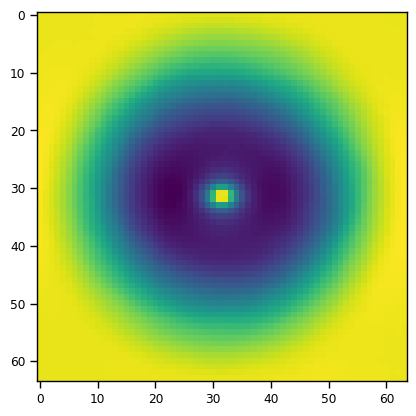

In [139]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable

# Define the PCA model
class PCAModel(nn.Module):
    def __init__(self, eigengalaxies, pca_mean, scores=None):
        super(PCAModel, self).__init__()
        self.eigengalaxies = eigengalaxies.reshape(eigengalaxies.shape[0],-1)  # Shape: (num_eigengalaxies, 64*64)
        self.pca_mean = pca_mean.reshape(-1) # Shape: (64*64)
        self.num_eigenvectors = self.eigengalaxies.shape[0]  # Number of eigenvectors
        if scores is None:
            # Initialize the scores
            scores = torch.zeros(self.num_eigenvectors, requires_grad=True)
            self.scores = nn.Parameter(scores)
        else:
            self.scores = nn.Parameter(scores, requires_grad=True)

    # Inside the forward method of PCAModel class
    def forward(self, input_image):
        # Flatten the input image
        input_image = input_image.flatten()
        
        # Expand dimensions of pca_mean tensor
        # Subtract the mean
        input_image -= self.pca_mean

        # Project onto eigengalaxies
        pca_scores = torch.matmul(input_image, self.eigengalaxies.t())

        return pca_scores

    def reconstruct_image(self, pca_scores):
        # Reconstruct the image from PCA scores
        reconstructed_image = torch.matmul(pca_scores, self.eigengalaxies)

        # Add the mean
        reconstructed_image += self.pca_mean

        # Reshape the image
        reconstructed_image = reconstructed_image.view(64, 64)
        return reconstructed_image


# Define the PCA loss function
class PCALoss(nn.Module):
    def __init__(self):
        super(PCALoss, self).__init__()

    def forward(self, input_image, pca_scores, model):
        reconstructed_image = model.reconstruct_image(pca_scores)
        loss = torch.mean(torch.square(input_image - reconstructed_image))
        return loss


class PCALoss(nn.Module):
    def __init__(self):
        super(PCALoss, self).__init__()

    def forward(self, input_image, pca_scores, model):
        reconstructed_image = model.reconstruct_image(pca_scores)
        
        # Calculate the reconstruction loss
        reconstruction_loss = torch.mean(torch.square(input_image - reconstructed_image))
        
        # Calculate the regularization loss
        regularization_loss = torch.mean(torch.square(pca_scores))
        
        # Combine the reconstruction loss and regularization loss
        loss = reconstruction_loss + regularization_loss
        
        return loss

# Instantiate the PCA model
eigengalaxies = mm.get_eigengalaxies()
means = mm.get_means()
masseigen = eigengalaxies[:, 2]
meanseigen = means[2]
# Set tensor to be of shape (1, 64, 64)
masseigen = masseigen.reshape(masseigen.shape[0], 64, 64)

eigen = torch.Tensor(masseigen)
means = torch.Tensor(meanseigen)
model = PCAModel(eigengalaxies=eigen, pca_mean=means)
# Instantiate the PCA loss function
loss_function = PCALoss()

# Set the known mass image
massimg = data.get_image("stars", "Masses", 10)
massimg = image.norm(massimg, **norm_function_args["Masses"])
massimg = torch.Tensor(massimg)


input_image = massimg

# Set up the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.1)

# Training loop
num_epochs = 100000
scores = []
for epoch in range(num_epochs):
    # Zero the gradients
    optimizer.zero_grad()

    # Forward pass
    pca_scores = model(input_image)
    scores.append(pca_scores)
    loss = loss_function(input_image, pca_scores, model)
    loss = Variable(loss, requires_grad = True)

    # Backward pass
    loss.backward()
    nn.utils.clip_grad_norm_(model.parameters(), max_norm=.5)

    # Update the parameters
    optimizer.step()

    # Print the loss every 100 epochs
    if (epoch + 1) % 500 == 0:
        print("Epoch [{}/{}], Loss: {:.4f}".format(epoch + 1, num_epochs, loss.item()))

# Test the trained model
pca_scores = model(input_image)
reconstructed_image = model.reconstruct_image(pca_scores)

# Print the loss and the reconstructed image
print("Reconstruction Loss:", loss.item())

bjkl = model.reconstruct_image(model(massimg))
plt.imshow(bjkl)

In [ ]:

masseigen = eigengalaxies[:,2]
masseigen.shape

# Project mass galaxy image to eigenspace of mass eigengalaxies
massimg = maps[2].flatten()-means[2].flatten()
masseigen = eigengalaxies[:,2].reshape(60,-1)
projection = np.dot(massimg, masseigen.T)

mass_rec = np.dot(projection, masseigen) + means[2].flatten()
plt.imshow(mass_rec.reshape(64,64))

In [90]:
massimg.flatten().shape

torch.Size([4096])

In [95]:
meanseigen.reshape(-1).shape


(4096,)

In [85]:
masseigen.shape

(60, 64, 64)

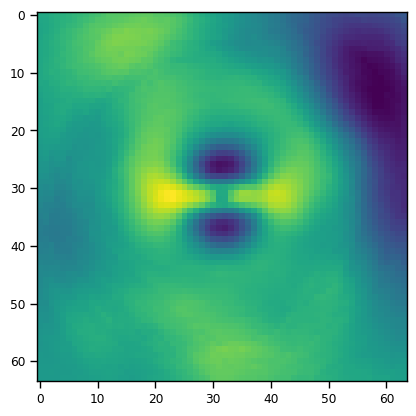

In [53]:
plt.imshow(mm.reconstruct(pca_scores.detach().numpy())[0])

In [236]:

import torch
import torch.optim as optim
from torch.nn.functional import conv2d, max_pool2d, cross_entropy

def init_weights(shape):
    # Kaiming He initialization (a good initialization is important)
    # https://arxiv.org/abs/1502.01852
    std = np.sqrt(2. / shape[0])
    w = torch.randn(size=shape) * std
    w.requires_grad = True
    return w


def rectify(x):
    # Rectified Linear Unit (ReLU)
    return torch.max(torch.zeros_like(x), x)


class RMSprop(optim.Optimizer):
    """
    This is a reduced version of the PyTorch internal RMSprop optimizer
    It serves here as an example
    """
    def __init__(self, params, lr=1e-3, alpha=0.5, eps=1e-8):
        defaults = dict(lr=lr, alpha=alpha, eps=eps)
        super(RMSprop, self).__init__(params, defaults)

    def step(self):
        for group in self.param_groups:
            for p in group['params']:
                grad = p.grad.data
                state = self.state[p]

                # state initialization
                if len(state) == 0:
                    state['square_avg'] = torch.zeros_like(p.data)

                square_avg = state['square_avg']
                alpha = group['alpha']

                # update running averages
                square_avg.mul_(alpha).addcmul_(grad, grad, value=1 - alpha)
                avg = square_avg.sqrt().add_(group['eps'])

                # gradient update
                p.data.addcdiv_(grad, avg, value=-group['lr'])

100%|██████████| 100001/100001 [01:07<00:00, 1490.69it/s]


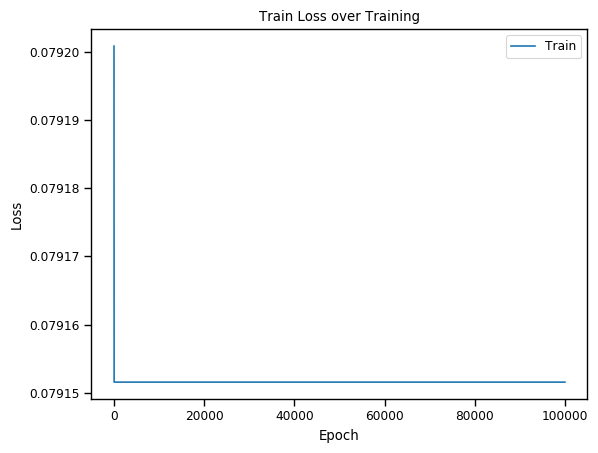

In [275]:
import torch
import torch.optim as optim
from torch.nn.functional import cross_entropy
from tqdm import trange

def init_weights(shape):
    # Kaiming He initialization (a good initialization is important)
    # https://arxiv.org/abs/1502.01852
    std = torch.sqrt(torch.tensor(2.) / shape[0])
    w = torch.randn(size=shape) * std
    w.requires_grad = True
    return w

def scoresModel(image, eigengalaxies, mean):
    y = image - mean
    scores = torch.matmul(y, eigengalaxies.t())
    return scores

def reconstruct(scores, eigengalaxies, mean):
    rec = torch.matmul(scores, eigengalaxies)
    rec = rec + mean
    return rec

scores = init_weights((60,))
optimizer = RMSprop(params=[scores])

n_epochs = int(1e5)

train_loss = []
test_loss = []

eigengalaxies = mm.get_eigengalaxies()
eigengalaxies = eigengalaxies.reshape(eigengalaxies.shape[0],-1)
eigengalaxies = torch.Tensor(eigengalaxies)


mean = mm.get_means()
mean = mean.reshape(-1)
mean = torch.Tensor(mean)

input_image = data.get_image("stars", "GFM_Metallicity", 10)
input_image = image.norm(input_image, **norm_function_args["GFM_Metallicity"]).flatten()

# Append zeros to the input image
zeros = torch.zeros(64 * 64 * 2)
input_image = np.append(input_image,zeros)

# Convert input_image to a PyTorch tensor
input_image = torch.Tensor(input_image)

min_lr = 1e-7
lr_decay_factor = 0.1
lr_decay_patience = 10  # Number of epochs to wait before decreasing learning rate
lr_decay_threshold = 1e-4  # Threshold for loss change to indicate plateau

wait_epochs = 0

for epoch in trange(n_epochs + 1):
    train_loss_this_epoch = []

    optimizer.zero_grad()
    #pca_scores = scoresModel(input_image, eigengalaxies, mean)
    reconstructed_image = reconstruct(scores, eigengalaxies, mean)
    loss = torch.mean(torch.square(input_image - reconstructed_image))
   
    train_loss_this_epoch.append(float(loss))

    loss.backward()
    optimizer.step()

    train_loss.append(torch.mean(torch.tensor(train_loss_this_epoch)))
    # Check for loss plateau and update learning rate if necessary
    if epoch > 0:
        loss_change = abs(train_loss[-2] - train_loss[-1])
        if loss_change < lr_decay_threshold:
            new_lr = optimizer.param_groups[0]['lr'] * lr_decay_factor
            optimizer.param_groups[0]['lr'] = new_lr
            wait_epochs = 0
        else:
            wait_epochs = 0
    

plt.plot(range(n_epochs + 1), train_loss, label="Train")
plt.title("Train Loss over Training")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [270]:
optimizer.lr

AttributeError: 'RMSprop' object has no attribute 'lr'

In [276]:
train_loss[-10:]

[tensor(0.0792),
 tensor(0.0792),
 tensor(0.0792),
 tensor(0.0792),
 tensor(0.0792),
 tensor(0.0792),
 tensor(0.0792),
 tensor(0.0792),
 tensor(0.0792),
 tensor(0.0792)]

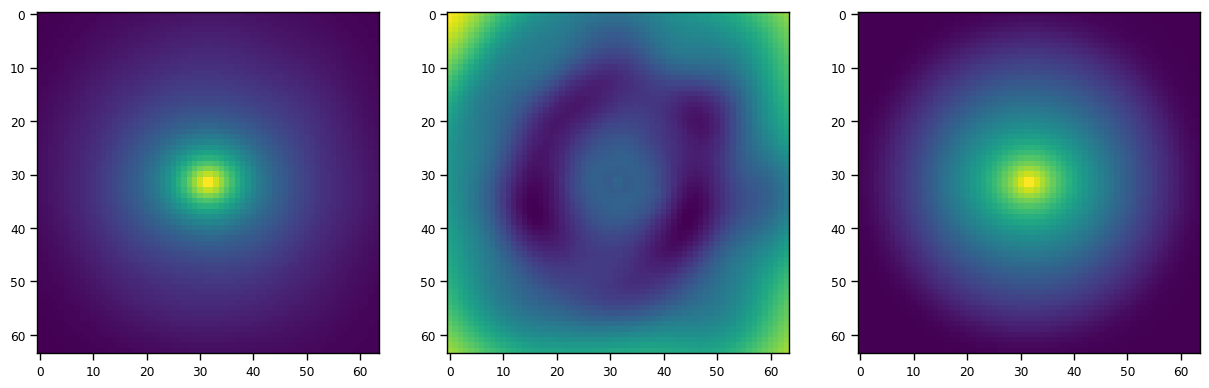

In [277]:
img = reconstruct(scores, eigengalaxies=eigengalaxies, mean=mean).reshape(3,64,64).detach().numpy()

fig,ax = plt.subplots(1,3, figsize = (15,10))
ax[0].imshow(img[0])
ax[1].imshow(img[1])
ax[2].imshow(img[2])

In [ ]:
64*64

216.79487716657061 2.452335625683158e-05


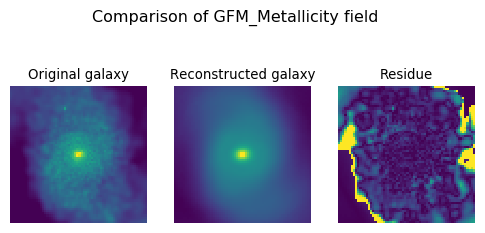

158.31047862218682 1.4568519751617237e-06


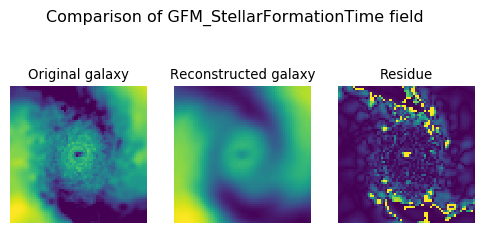

3212.0991108960197 1.8892511692599182e-05


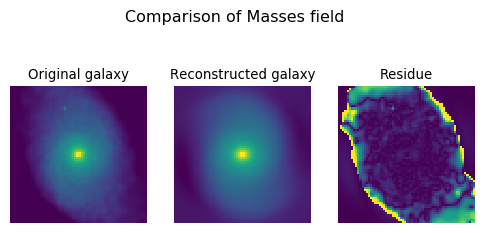

In [266]:
mm.compare(10)

Epoch [500/10000], Loss: 0.0039
Epoch [1000/10000], Loss: 0.0039
Epoch [1500/10000], Loss: 0.0039
Epoch [2000/10000], Loss: 0.0039
Epoch [2500/10000], Loss: 0.0039
Epoch [3000/10000], Loss: 0.0039
Epoch [3500/10000], Loss: 0.0039
Epoch [4000/10000], Loss: 0.0039
Epoch [4500/10000], Loss: 0.0039
Epoch [5000/10000], Loss: 0.0039
Epoch [5500/10000], Loss: 0.0039
Epoch [6000/10000], Loss: 0.0039
Epoch [6500/10000], Loss: 0.0039
Epoch [7000/10000], Loss: 0.0039
Epoch [7500/10000], Loss: 0.0039
Epoch [8000/10000], Loss: 0.0039
Epoch [8500/10000], Loss: 0.0039
Epoch [9000/10000], Loss: 0.0039
Epoch [9500/10000], Loss: 0.0039
Epoch [10000/10000], Loss: 0.0039
Reconstruction Loss: 0.003948548808693886


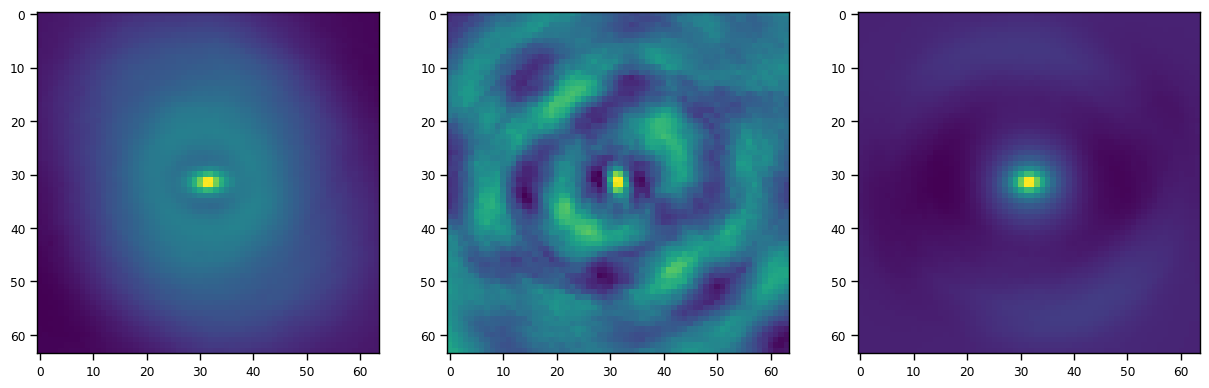

In [223]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable

# Define the PCA model
class PCAModel(nn.Module):
    def __init__(self, eigengalaxies, pca_mean, scores=None):
        super(PCAModel, self).__init__()
        self.eigengalaxies = eigengalaxies.reshape(eigengalaxies.shape[0],-1)  # Shape: (num_eigengalaxies, 64*64)
        self.pca_mean = pca_mean.reshape(-1) # Shape: (3*64*64)
        self.num_eigenvectors = self.eigengalaxies.shape[0]  # Number of eigenvectors
        if scores is None:
            # Initialize the scores
            scores = torch.zeros(self.num_eigenvectors, requires_grad=True)
            self.scores = nn.Parameter(scores)
        else:
            self.scores = nn.Parameter(scores, requires_grad=True)

    # Inside the forward method of PCAModel class
    def forward(self, input_image):
        # Flatten the input image
        img = input_image.flatten().clone()
    
        # Subtract the mean
        img -= self.pca_mean

        # Project onto eigengalaxies
        pca_scores = torch.matmul(img, self.eigengalaxies.t())

        return pca_scores

    def reconstruct_image(self, pca_scores):
        # Reconstruct the image from PCA scores
        reconstructed_image = torch.matmul(pca_scores, self.eigengalaxies)

        # Add the mean
        reconstructed_image += self.pca_mean

        # Reshape the image
        reconstructed_image = reconstructed_image.view(3,64, 64)
        return reconstructed_image


# Define the PCA loss function
class PCALoss(nn.Module):
    def __init__(self):
        super(PCALoss, self).__init__()

    def forward(self, input_image, pca_scores, model):
        reconstructed_image = model.reconstruct_image(pca_scores)
        loss = torch.mean(torch.square(input_image - reconstructed_image))
        return loss


class PCALoss(nn.Module):
    def __init__(self):
        super(PCALoss, self).__init__()

    def forward(self, input_image, pca_scores, model):
        reconstructed_image = model.reconstruct_image(pca_scores)
        
        #Take only first image
        reconstructed_image = reconstructed_image[0]
        input_image = input_image.reshape(3,64,64)[0]
 
        # Calculate the reconstruction loss
        reconstruction_loss = torch.mean(torch.square(input_image - reconstructed_image))
        
        # Calculate the regularization loss
        regularization_loss = torch.mean(torch.square(pca_scores))
        
        # Combine the reconstruction loss and regularization loss
        loss = reconstruction_loss 
        
        return loss
    
def recLoss(input_image,pca_scores,model):
    reconstructed_image = model.reconstruct_image(pca_scores)
    #Take only first image
    reconstructed_image = reconstructed_image[0]
    input_image = input_image.reshape(3,64,64)[0]

    # Calculate the reconstruction loss
    loss = torch.mean(torch.square(input_image - reconstructed_image))
    return loss
    

# Instantiate the PCA model

eigengalaxies = mm.get_eigengalaxies()
means = mm.get_means()


eigen = torch.Tensor(eigengalaxies)
means = torch.Tensor(means)
model = PCAModel(eigengalaxies=eigen, pca_mean=means)
# Instantiate the PCA loss function
loss_function = recLoss

# Set the known mass image
galimg = data.get_image("stars", "GFM_Metallicity", 10)
galimg = image.norm(galimg, **norm_function_args["GFM_Metallicity"]).flatten()

zeros = np.zeros(64*64*2)
input_image = np.append(galimg,zeros)
input_image = torch.Tensor(input_image)


# Set up the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.1)

# Training loop
num_epochs = 10000
scores = []
for epoch in range(num_epochs):
    # Zero the gradients
    optimizer.zero_grad()

    # Forward pass
    pca_scores = model(input_image)
    scores.append(pca_scores)
    loss = loss_function(input_image, pca_scores, model)
    loss = Variable(loss, requires_grad = True)

    # Backward pass
    loss.backward()


    # Update the parameters
    optimizer.step()

    # Print the loss every 100 epochs
    if (epoch + 1) % 500 == 0:
        print("Epoch [{}/{}], Loss: {:.4f}".format(epoch + 1, num_epochs, loss.item()))

# Test the trained model
pca_scores = model(input_image)
reconstructed_image = model.reconstruct_image(pca_scores)

# Print the loss and the reconstructed image
print("Reconstruction Loss:", loss.item())

bjkl = model.reconstruct_image(model(input_image))

fig,ax = plt.subplots(1,3, figsize = (15,10))
ax[0].imshow(bjkl[0])
ax[1].imshow(bjkl[1])
ax[2].imshow(bjkl[2])

In [184]:
galimg = data.get_image("stars", "GFM_Metallicity", 10)
galimg = image.norm(galimg, **norm_function_args["GFM_Metallicity"]).flatten()

zeros = np.zeros(64*64*2)
input_image = np.append(galimg,zeros)
input_image = torch.Tensor(input_image)

# new try

In [292]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split


# Define the neural network architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # Define the layers of your neural network
        self.fc1 = nn.Linear(12288, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 60)  # 60 output nodes for PCA scores

    def forward(self, x):
        x = torch.flatten(x, start_dim = 1)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Step 3: Split the dataset into training and testing sets

# Step 4: Train the neural network

model = Net()
criterion = nn.MSELoss()  # Use mean squared error as the loss function
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Choose an optimizer

num_epochs = 1000




data = mm.datamatrix.reshape(12484,3,64,64)
targets = mm.scores



# Split the data into train and test sets
train_data, test_data, train_targets, test_targets = train_test_split(data, targets, test_size=0.2, random_state=42)

# Assuming you have your training data and targets as tensors

train_data = torch.Tensor(train_data)
train_targets = torch.Tensor(train_targets)
# Convert training data and targets into a TensorDataset
train_dataset = TensorDataset(train_data, train_targets)

# Define the batch size for training
batch_size = 64

# Create the train_loader
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

#Training time 45 min
for epoch in range(num_epochs):
    running_loss = 0.0
    for inputs, targets in train_loader:  # Iterate over the training set
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    average_loss = running_loss / len(train_loader)
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {average_loss}")
# Step 5: Evaluate the trained model
# Compute predicted Metallicity and Age maps for the testing set
# Compare predicted maps with ground truth and calculate evaluation metrics


Epoch 1/1000, Loss: 1.6399963794240526
Epoch 2/1000, Loss: 0.5606610116305625
Epoch 3/1000, Loss: 0.35765216703627517
Epoch 4/1000, Loss: 0.2561714843769742
Epoch 5/1000, Loss: 0.20737810513585997
Epoch 6/1000, Loss: 0.16038327640408923
Epoch 7/1000, Loss: 0.12835732225779514
Epoch 8/1000, Loss: 0.11053665219598514
Epoch 9/1000, Loss: 0.0874435732224185
Epoch 10/1000, Loss: 0.08134175191639335
Epoch 11/1000, Loss: 0.057648588031245646
Epoch 12/1000, Loss: 0.057658166618673665
Epoch 13/1000, Loss: 0.04599251259996253
Epoch 14/1000, Loss: 0.04501475263268325
Epoch 15/1000, Loss: 0.03286806448914443
Epoch 16/1000, Loss: 0.03911957881490516
Epoch 17/1000, Loss: 0.04512522939094313
Epoch 18/1000, Loss: 0.027748422169239277
Epoch 19/1000, Loss: 0.024608462408279918
Epoch 20/1000, Loss: 0.02656533272497973
Epoch 21/1000, Loss: 0.02504930289307977
Epoch 22/1000, Loss: 0.029143670057747394
Epoch 23/1000, Loss: 0.028765193435843963
Epoch 24/1000, Loss: 0.023420138776919265
Epoch 25/1000, Loss: 0

In [311]:
# Evaluation

# Put the model in evaluation mode
model.eval()

# Create tensors for the test data
test_data = torch.Tensor(test_data)
test_targets = torch.Tensor(test_targets)

# Create a test dataset
test_dataset = TensorDataset(test_data, test_targets)

# Create a test data loader
test_loader = DataLoader(test_dataset, batch_size=batch_size)

# Lists to store predicted Metallicity and Age maps

# Disable gradient calculation
predicted_scores = []
with torch.no_grad():
    for inputs, targets in test_loader:
        # Forward pass
        outputs = model(inputs)
        predicted_scores.append(outputs.numpy())

predscores = np.concatenate(predicted_scores)

In [348]:
torch.save(model, 'mass_model.pth')
torch.save(model.state_dict(), 'mass_model_state.pth')

In [308]:
test_data[10].shape

torch.Size([3, 64, 64])

In [357]:
def evaluate_prediction(predicted_score, target_score, plot = True):
    reconstructed_images_pred = mm.reconstruct(predicted_score)
    reconstructed_images_target = mm.reconstruct(target_score)
    # Make residual plots for all 3 maps
    # Calculate residuals for each map
    residuals = np.abs(reconstructed_images_pred - reconstructed_images_target) / reconstructed_images_target * 100

    reconstruction_error = np.median(residuals)
    if not plot: return reconstruction_error
    # Plot the original images, reconstructed images, and residuals
    fig, axes = plt.subplots(3, 3, figsize=(10, 10))
    # Iterate over the maps
    for i in range(3):
        # Plot original image
        axes[i, 0].imshow(reconstructed_images_target[i])
        axes[i, 0].set_title(f"Ground Truth Map {i+1}")
        # Plot reconstructed image from predicted scores
        axes[i, 1].imshow(reconstructed_images_pred[i])
        axes[i, 1].set_title(f"Reconstructed (Predicted) Map {i+1}")

        axes[i,2].imshow(residuals[i], cmap = "coolwarm",vmin=-100, vmax=100)
        axes[i, 2].set_title(f"Residual {i+1}")

        
        

        # Set axis labels
        for j in range(3):
            axes[i, j].axis("off")

    plt.tight_layout()
    plt.show()
    return reconstruction_error

In [368]:

rec_errors = [evaluate_prediction(predscores[index], test_targets[index], plot=False) for index in range(test_targets.shape[0])]

(array([  1.,  19.,  93., 203., 317., 304., 277., 242., 199., 149., 114.,
         99.,  66.,  54.,  37.,  29.,  30.,  31.,  22.,  25.,  25.,  17.,
         15.,  12.,  14.,  13.,  10.,   8.,   8.,   5.,   7.,   4.,   3.,
          4.,   3.,   0.,   2.,   5.,   4.,   3.,   3.,   5.,   2.,   2.,
          1.,   2.,   0.,   0.,   0.,   0.,   2.,   1.,   0.,   3.,   0.,
          0.,   0.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([0.37500078, 0.47107436, 0.56714794, 0.66322151, 0.75929509,
        0.85536867, 0.95144224, 1.04751582, 1.1435894 , 1.23966297,
        1.33573655, 1.43181013, 1.5278837 , 1.62395728, 1.72003086,
        1.81610443, 1.91217801, 2.00825158, 2.10432516, 2.20039874,
        2.29647231, 2.39254589, 2.48861947, 2.

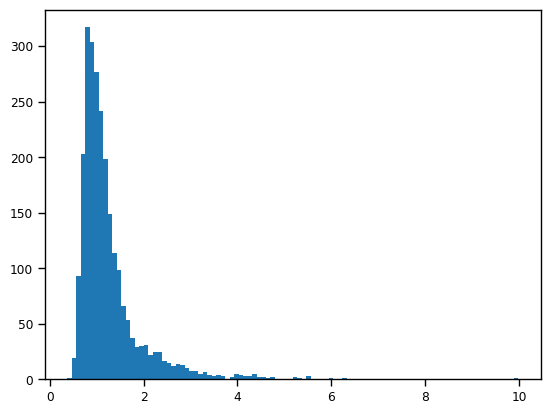

In [370]:
plt.hist(rec_errors, bins = 100)

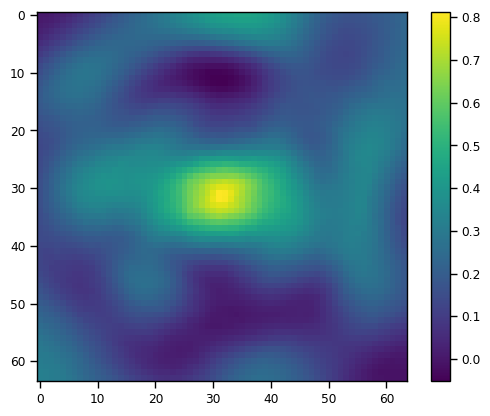

In [377]:
input_image.shape

torch.Size([12288])

In [385]:
input_image = np.append(mass_image.flatten(), np.zeros(64*64*2))
input_image=torch.Tensor(input_image)
input_image = torch.reshape(input_image, (1, 12288))
input_image = torch.flatten(input_image, start_dim=1)
with torch.no_grad():
    outputs = model(input_image)
    predicted_scores.append(outputs.numpy())

scor = np.concatenate(predicted_scores)

In [384]:
predicted_scores.shape

AttributeError: 'list' object has no attribute 'shape'